# Class \#10 activities

# Practice with `pandas`: Ballard Locks salmon counts

In [ ]:
# Import NumPy, Pandas, Matplotlib, and datetime at the top of your code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Give Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Filepath for Ballard Locks salmon count data

# Note: you may need to change this to match your own filepath,
# which you can get by opening the left sidebar (folder icon),
# navigating to the file, clicking the "..." on the file, and
# selecting "Copy path"
filepath = '/content/drive/My Drive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-11-05 - class #10 - data/ballard_salmon_counts.csv'

## **Breakout rooms, round 1**

0. Assign roles:
> * **Choose one person to write code and share their screen.**
> * **Choose a second person to take notes on the answers to report back to the class.**
1. Load the salmon data CSV file into Pandas.
> * When you do this, specify that the 0th column (the dates) should be the index.
>
> * Also specify that Pandas should parse the index as dates (datetimes).
>
> * Consult the documentation for [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to find the arguments to specify these two things.
2. Display the data.
3. Use `.describe()` to view the summary statistics.
4. Answer the following questions with your group:

* How many salmon species are counted?
* When does this data start and end?
* What are the average daily counts for each species?
* What are the highest daily counts for each species?

In [ ]:
# Load the float data file from Google Drive as a Pandas DataFrame
salmon_data = pd.read_csv(filepath,index_col=0,parse_dates=True)

# View data and stats
display(salmon_data)
salmon_data.describe()

# Answers:
# a. 3 species
# b. June 2013 to October 2020
# c. 242, 247, 1316 for Chinook, Coho, Sockeye
# d. 916, 1026, 12936

,Chinook,Coho,Sockeye
2013-06-12,NaN,NaN,2778.0
2013-06-13,NaN,NaN,2424.0
2013-06-14,NaN,NaN,1285.0
2013-06-15,NaN,NaN,2430.0
2013-06-16,NaN,NaN,3081.0
...,...,...,...
2020-09-28,NaN,219.0,NaN
2020-09-29,NaN,81.0,NaN
2020-09-30,NaN,13.0,NaN
2020-10-01,NaN,44.0,NaN


,Chinook,Coho,Sockeye
count,55.000000,32.000000,370.000000
mean,224.290909,246.718750,1315.670270
std,218.044395,238.581052,1746.660107
min,0.000000,13.000000,0.000000
25%,59.000000,75.750000,159.250000
50%,164.000000,154.500000,699.000000
75%,305.000000,378.500000,1745.000000
max,916.000000,1026.000000,12936.000000


## **Breakout rooms, round 2**

**Plot the data!**
1. Create a single blank figure.  Set the `figsize` argument so it will take up the entire width of the page.
2. Then use `plt.plot()` or `ax.plot()` to make line plots of each of the three species' counts over time. In other words, the x-values should be datetimes from the index and the y-values should be daily salmon counts.
3. Choose the following colors for each line:
> * Chinook: 'forestgreen'
>
> * Coho: 'darkcyan'
>
> * Sockeye: 'salmon'
>


4. Label your plot axes and add a title.
5. Add a grid to your plot.

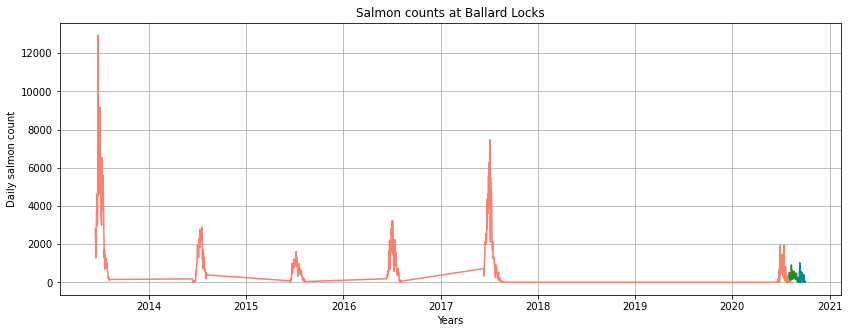

In [ ]:
# Plot the data here:

plt.figure(figsize=(14,5))
# Alternative way of setting up a figure; then you'll call ax.plot()
# fig, ax = plt.subplots(figsize=(30,15))

# You can save each to a variable...
# x_chinook = salmon_data['Chinook'].index
# y_chinook = salmon_data['Chinook']
# p_chinook = plt.plot(x_chinook,y_chinook,c='forestgreen')

# ... or you can plot each in a single of code
plt.plot(salmon_data['Chinook'].index,salmon_data['Chinook'] ,c='forestgreen')
plt.plot(salmon_data['Coho'].index,salmon_data['Coho'] ,c='darkcyan')
plt.plot(salmon_data['Sockeye'].index,salmon_data['Sockeye'] ,c='salmon')

plt.xlabel('Years')
plt.ylabel('Daily salmon count')
plt.title('Salmon counts at Ballard Locks')
plt.grid()

## **Breakout rooms, round 3**

**Index into the data to discover information**
1. Use indexing to find out how many coho salmon passed through Ballard Locks on September 30, 2020, the day that Autumn Quarter started at UW. Hint: you'll need either `.iloc[]` or `.loc[]` to do this.
2. Use indexing with slicing (`:`) to get the sockeye salmon counts for all dates in the years specified below. You may wish to `print()` the results to check that they're correct.
> * First, do this for 2020. Save the result as a new variable, `sockeye_2020`.
>
> * Then, do the same for 2013. Save this as `sockeye_2013`.
>
3. Apply NumPy functions to `sockeye_2020` and `sockeye_2013` to find the following:
> * The highest daily sockeye count in each year (2013 and 2020).
>
> * The total number of sockeye that passed through Ballard Locks in each year.
>
4. Think about how you'd do Steps 2-3 in a single line of code — in other words, without saving the sliced Pandas objects as new variables.


In [ ]:
# Part 1
salmon_data.loc[datetime(2020,9,30)]['Coho']
print('Number of coho on 9/30/20:',salmon_data.loc[datetime(2020,9,30)]['Coho'])

# Alternative methods:
# print(salmon_data['Coho'].loc[datetime(2020,9,30)])
# print(salmon_data.loc['2020-09-30']['Coho'])

# Part 2
sockeye_2020 = salmon_data['Sockeye'].loc[datetime(2020,1,1):datetime(2020,12,31)]
sockeye_2013 = salmon_data['Sockeye'].loc[datetime(2013,1,1):datetime(2013,12,31)]

# Alternative methods:
# sockeye_2020 = salmon_data['Sockeye'].loc[datetime(2020,1,1):]
# sockeye_2013 = salmon_data['Sockeye'].loc['2013-1-1':'2013-12-31']
# sockeye_2013 = salmon_data['Sockeye'].loc['2013']

# Part 3
print('Highest sockeye count in 2013:',sockeye_2013.max())
print('Highest sockeye count in 2020:',sockeye_2020.max())
print('Total sockeye in 2013:',sockeye_2013.sum())
print('Total sockeye in 2020:',sockeye_2020.sum())

# Part 4
# Example of syntax:
salmon_data['Sockeye'].loc[datetime(2020,1,1):datetime(2020,12,31)].max()

Number of coho on 9/30/20: 13.0
Highest sockeye count in 2013: 12936.0
Highest sockeye count in 2020: 1961.0
Total sockeye in 2013: 178422.0
Total sockeye in 2020: 22954.0


1961.0

# Practice with `xarray`: World Ocean Atlas global ocean temperatures

In [ ]:
# Import xarray and download netCDF4 library
import xarray as xr
!pip install netcdf4  # You can comment this out once it has run

# Filepath for World Ocean Atlas 2018 (WOA18) temperature netCDF file
# Note: you may need to change this to match your own filepath
filepath = '/content/drive/My Drive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-11-05 - class #10 - data/woa18_temp.nc'

     |████████████████████████████████| 4.3MB 4.5MB/s 
     |████████████████████████████████| 296kB 46.3MB/s 


## **Breakout rooms, round 4**

0. Assign new roles:
> * **Choose a different person to write code and share their screen.**
> * **Choose a different person to take notes on the answers to report back to the class.**
1. Load the WOA18 netCDF file into xarray using `xr.open_dataset()`.
2. Display the data.
3. Using just the interactive display, answer the following questions with your group:

* How many data variables are there?
* The variable abbreviations aren't very informative. Using the attributes button (page icon), can you tell what the variables represent?
* What is the time range of the data?
* What is the latitude and longitude resolution (spacing) of the data? Note that we call this the "grid spacing" or "resolution" of the data.
* What is the deepest depth level in the data?
* Take a peek at the 46 attributes. What is one thing you can learn from them?

In [ ]:
# Load the data file from Google Drive as an xarray Dataset


# View data and stats



## **Breakout rooms, round 5**

![Image](https://www.mapsofworld.com/images/map-of-world-oceans.jpg)

1. Use the ocean map to find the longitude (in units of °N) and latitude (in units of °E) of your favorite part of the global oceans.
2. Use indexing to find out the most recent ocean surface temperature (in 2011) at that location. Hint: you'll need either `.isel()` or `.sel()` to do this.
3. Convert this result from `xarray` format to a single float number.

In [ ]:
# Write code here:



## **Breakout rooms, round 6**

1. Use indexing to get a time series of ocean surface temperature at the location you choose earlier. Save this as a new variable, `time_series`. (In other words, select in latitude, longitude, and depth, leaving a single dimension: time.)
2. Use indexing to get a depth profile of ocean temperature at the location you choose earlier in 2011. Save this as a new variable, `depth_profile`. (In other words, select in latitude, longitude, and time, leaving a single dimension: depth.)
3. Take a peek into these new variables using `display()`. How would you convert these from `xarray` format to 1-D NumPy arrays?

In [ ]:
# Write code here:



## **Breakout rooms, round 7**

1. Apply a NumPy function to `time_series` to calculate the average temperature at your chosen location over time. Get the answer as a single float number, not an `xarray` object.

2. Create a new blank Matplotlib figure with two subplots, side-by-side. Use `ax.plot()` to make a line plot on each subplot:
> * On the left subplot, plot the time series (time vs. temperature).
>
> * On the right subplot, plot the depth profile (temperature vs. depth). Reverse the depth axis using `ax.invert_yaxis()`.
>
> * Label your axes and add a grid.



In [ ]:
# Part 1:


# Part 2:

